In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression

In [70]:
df = pd.read_csv("Case_PRB_Europe_Only_true_Steven_Testing_last config shit_V0.16.csv")
df = df.groupby("location")

df = df.get_group("United Kingdom")

In [102]:
xKey = "total_cases"
yKey = "total_deaths"

deaths_X = df.iloc[:, df.columns.get_loc(xKey)].values.reshape(-1, 1)
corr_Y = df.iloc[:, df.columns.get_loc(yKey)].values.reshape(-1, 1)

In [103]:
linear_regressor = LinearRegression()
linear_regressor.fit(deaths_X, corr_Y)
Y_pred = linear_regressor.predict(deaths_X)

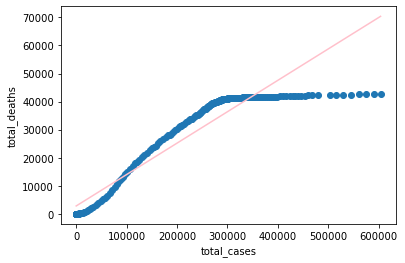

In [104]:
plt.scatter(deaths_X, corr_Y)
plt.plot(deaths_X, Y_pred, color="pink")
plt.xlabel(xKey)
plt.ylabel(yKey)
plt.show()